# Data Analysis for VoyceMe

## ETL Process

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

users_dim_df = pd.read_csv('users.csv')
transactions_fact_df = pd.read_csv('transactions.csv')
series_dim_df = pd.read_csv('series.csv')

users_dim_df.set_index("user_id", inplace=True)
series_dim_df.set_index("series_id", inplace=True)

full_obt = transactions_fact_df\
    .join(users_dim_df, on="user_id", how="inner")\
    .join(series_dim_df, on="series_id", how="inner")

date_aggregate = full_obt.groupby(["date"], as_index=False)[["views", "search_count"]].sum()

date_platform_aggregate = full_obt.groupby(["date", "platform"], as_index=False)[["views", "search_count"]].sum()

platform_aggregate = full_obt.groupby(["platform"], as_index=False)[["views", "search_count"]].sum()

platform_genre_aggregate = full_obt.groupby(["platform", "genre"], as_index=False)[["views", "search_count"]].sum()

platform_title_aggregate = full_obt.groupby(["platform", "title"], as_index=False)[["views", "search_count"]].sum()

## Visualizations

### Views and Search Count over Time

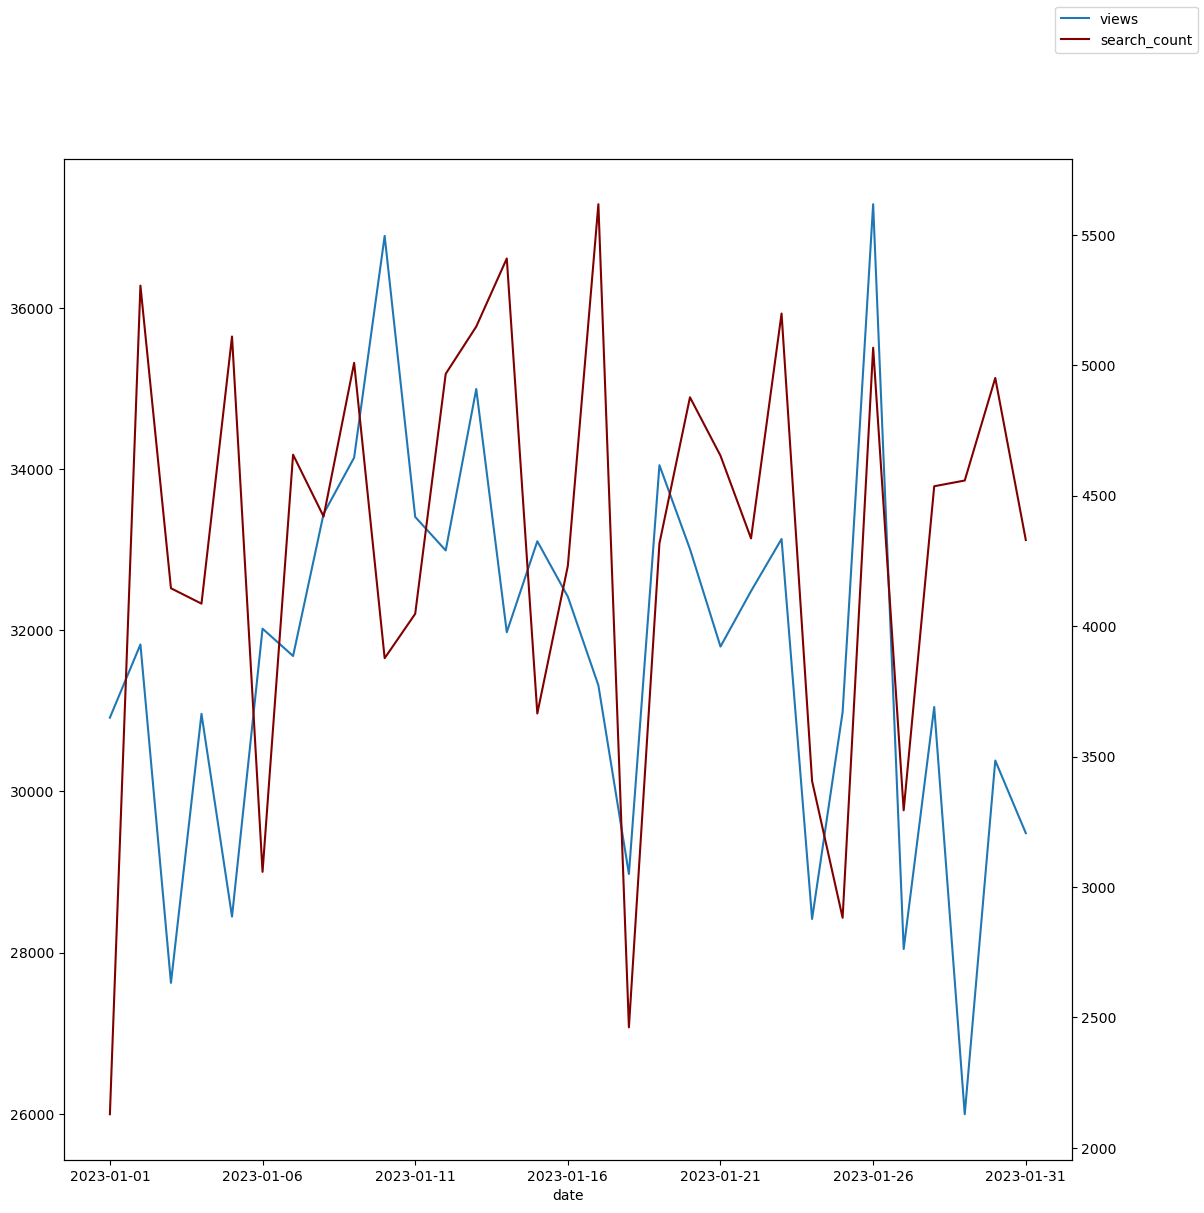

In [2]:
# Views and Search Count over time

plot_dims = (2^15, 2^15)
ax = date_aggregate.plot(x="date", y="views", legend=False, figsize=plot_dims)
ax2 = ax.twinx()
date_aggregate.plot(x="date", y="search_count", ax=ax2, legend=False, color="maroon", figsize=plot_dims)
ax.figure.legend()
plt.show()



### Views and Searches per Platform

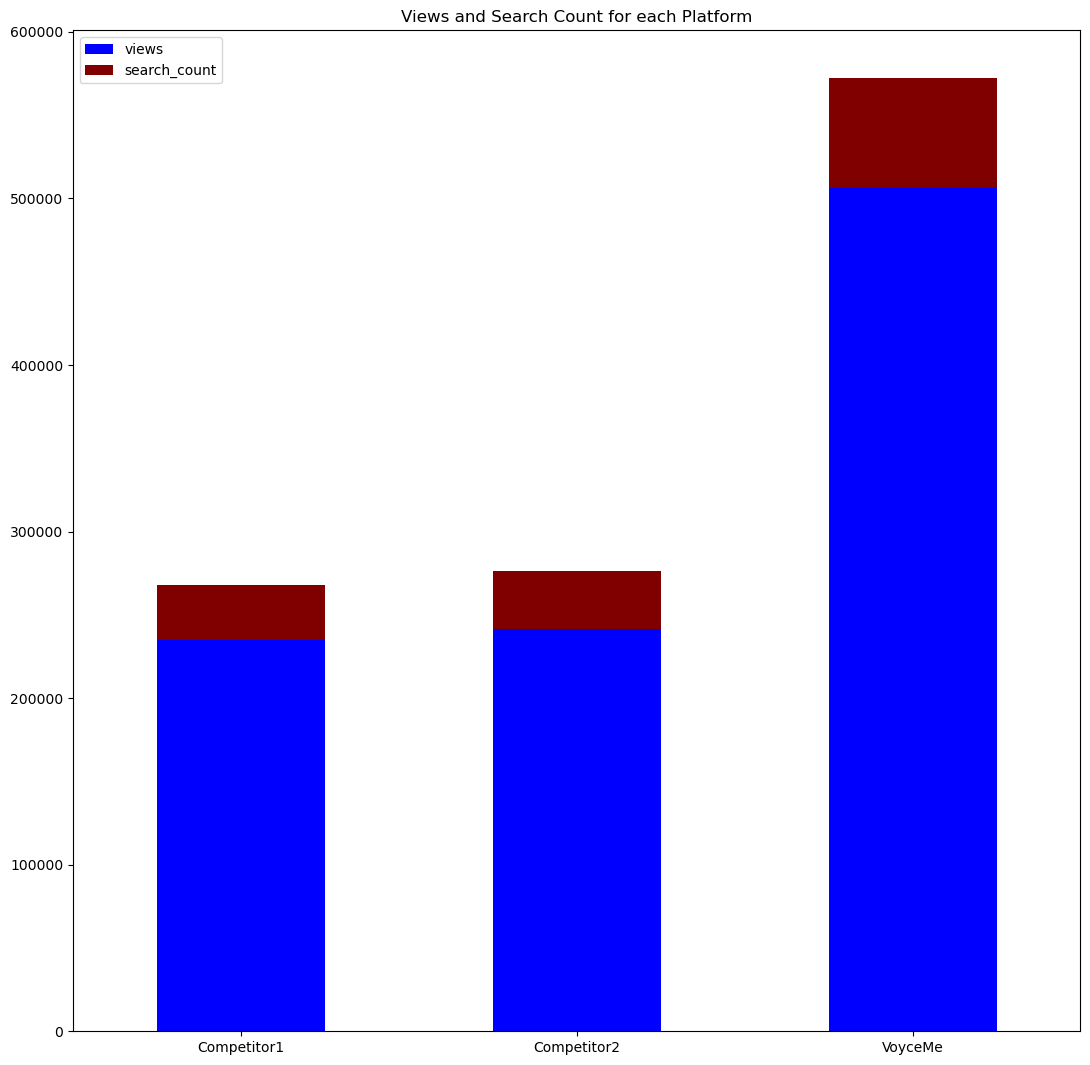

In [3]:
# Views and Counts per platform

platform_aggregate_plot = platform_aggregate.plot(kind="bar", x="platform", stacked=True, color=["blue", "maroon"], figsize=plot_dims)
platform_aggregate_plot.set_xticklabels(platform_aggregate_plot.get_xticklabels(), rotation=0)
platform_aggregate_plot.set(xlabel=None)
platform_aggregate_plot.set(title="Views and Search Count for each Platform")

plt.show()

### Views and Searches for each Genre on each Platform

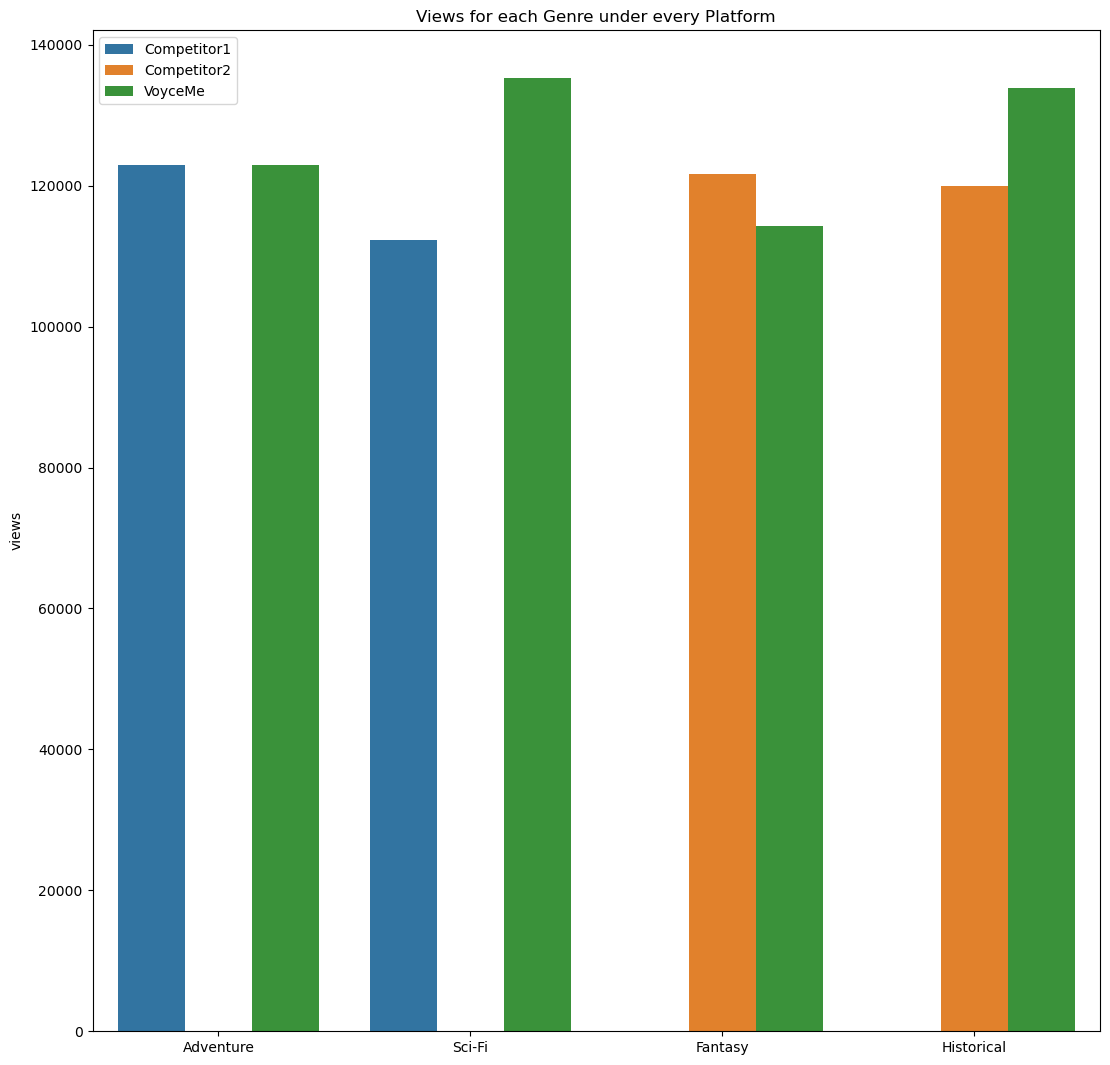

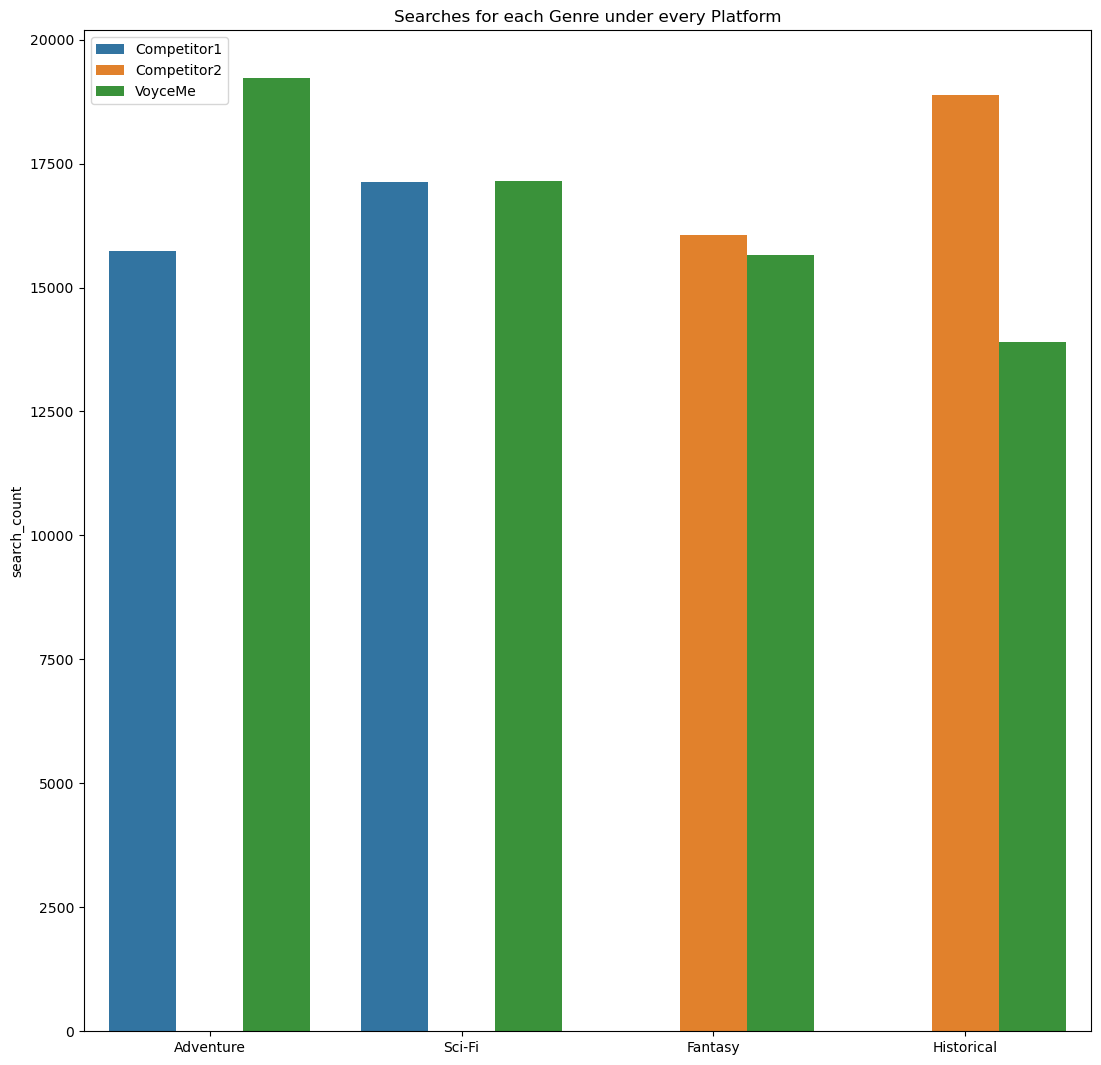

In [4]:
# Views for each Genre under each Platform

def bar_plotting(x_axis, y_axis, hue, data, plot_dims, title):

    fig, bar_axis_properties = plt.subplots(figsize=plot_dims)
    platform_genre_aggregate_plot = sns.barplot(x=x_axis, y=y_axis, hue=hue, data=data, ax=bar_axis_properties) 
    handles, labels = platform_genre_aggregate_plot.get_legend_handles_labels()
    platform_genre_aggregate_plot.legend(handles=handles[0:], labels=labels[0:])
    sns.move_legend(platform_genre_aggregate_plot,"upper left")
    platform_genre_aggregate_plot.set(xlabel=None)
    platform_genre_aggregate_plot.set(title=title)

    plt.show()

    return 

bar_plotting(x_axis='genre', y_axis='views', hue='platform', data=platform_genre_aggregate, plot_dims=plot_dims, title="Views for each Genre under every Platform")
bar_plotting(x_axis='genre', y_axis='search_count', hue='platform', data=platform_genre_aggregate, plot_dims=plot_dims, title="Searches for each Genre under every Platform")

### Views and Searches for each Series Title on each Platform

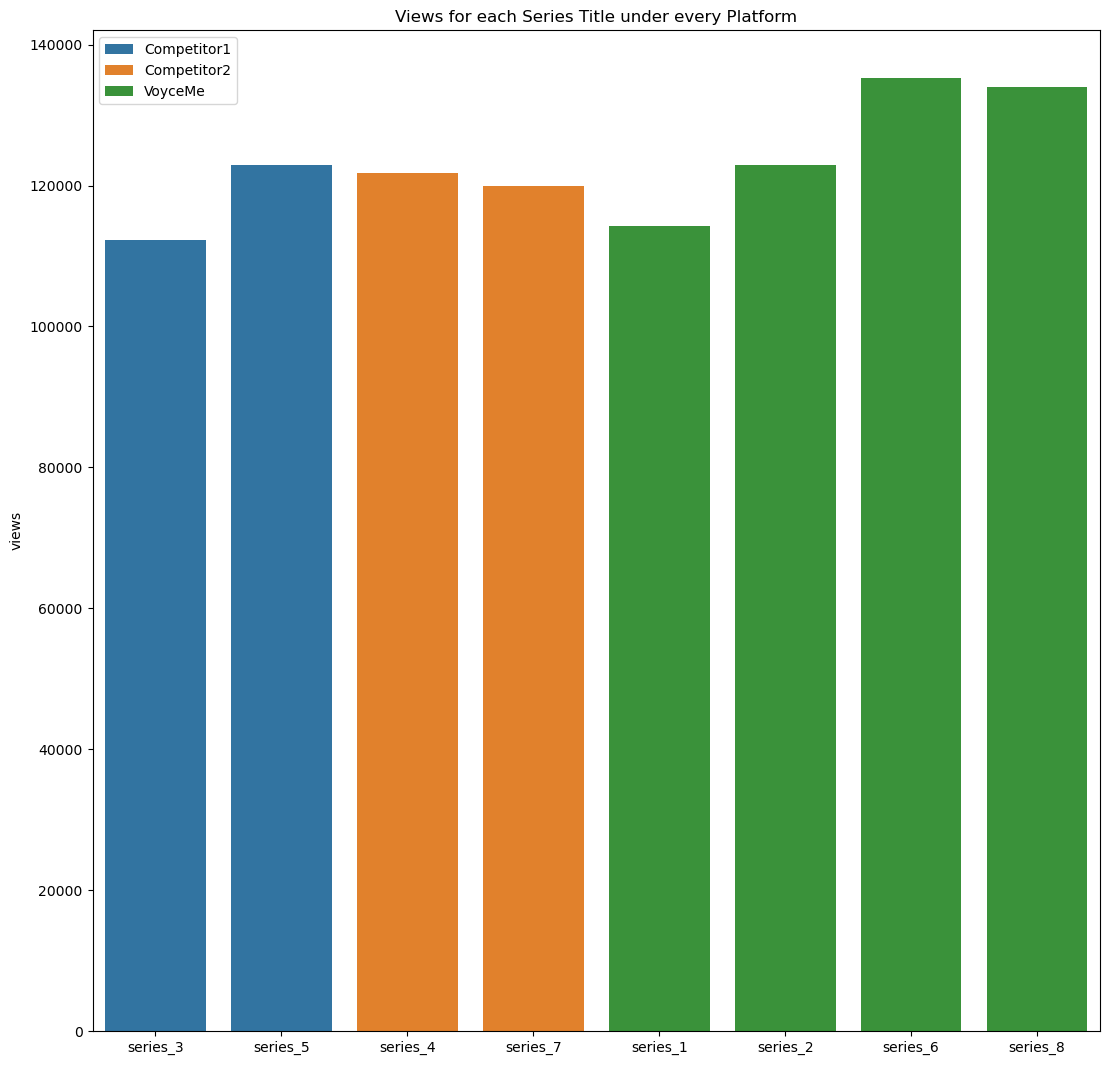

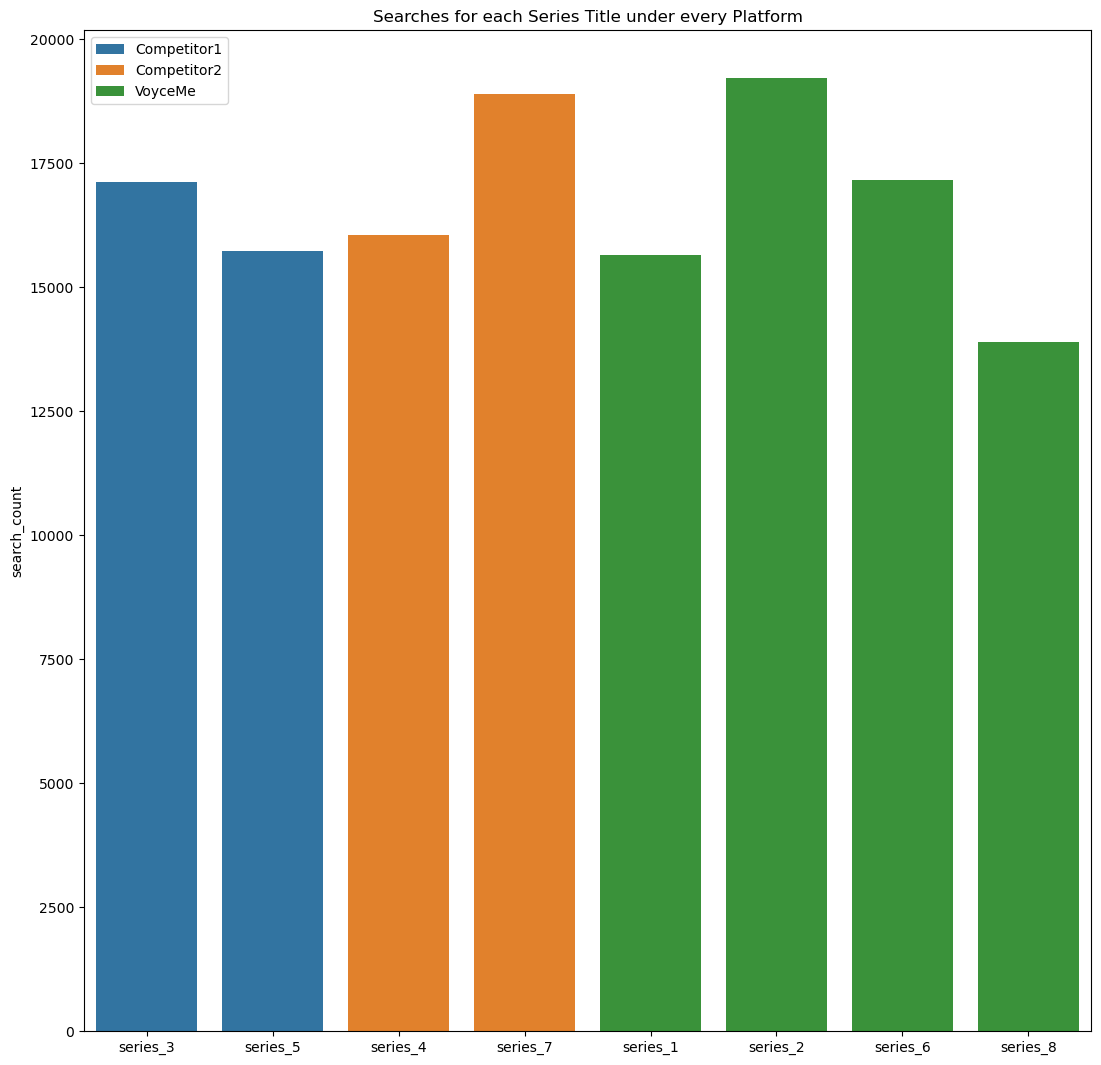

In [5]:
# Searches for each Genre under each Platform

bar_plotting(x_axis='title', y_axis='views', hue='platform', data=platform_title_aggregate, plot_dims=plot_dims, title="Views for each Series Title under every Platform")
bar_plotting(x_axis='title', y_axis='search_count', hue='platform', data=platform_title_aggregate, plot_dims=plot_dims, title="Searches for each Series Title under every Platform")